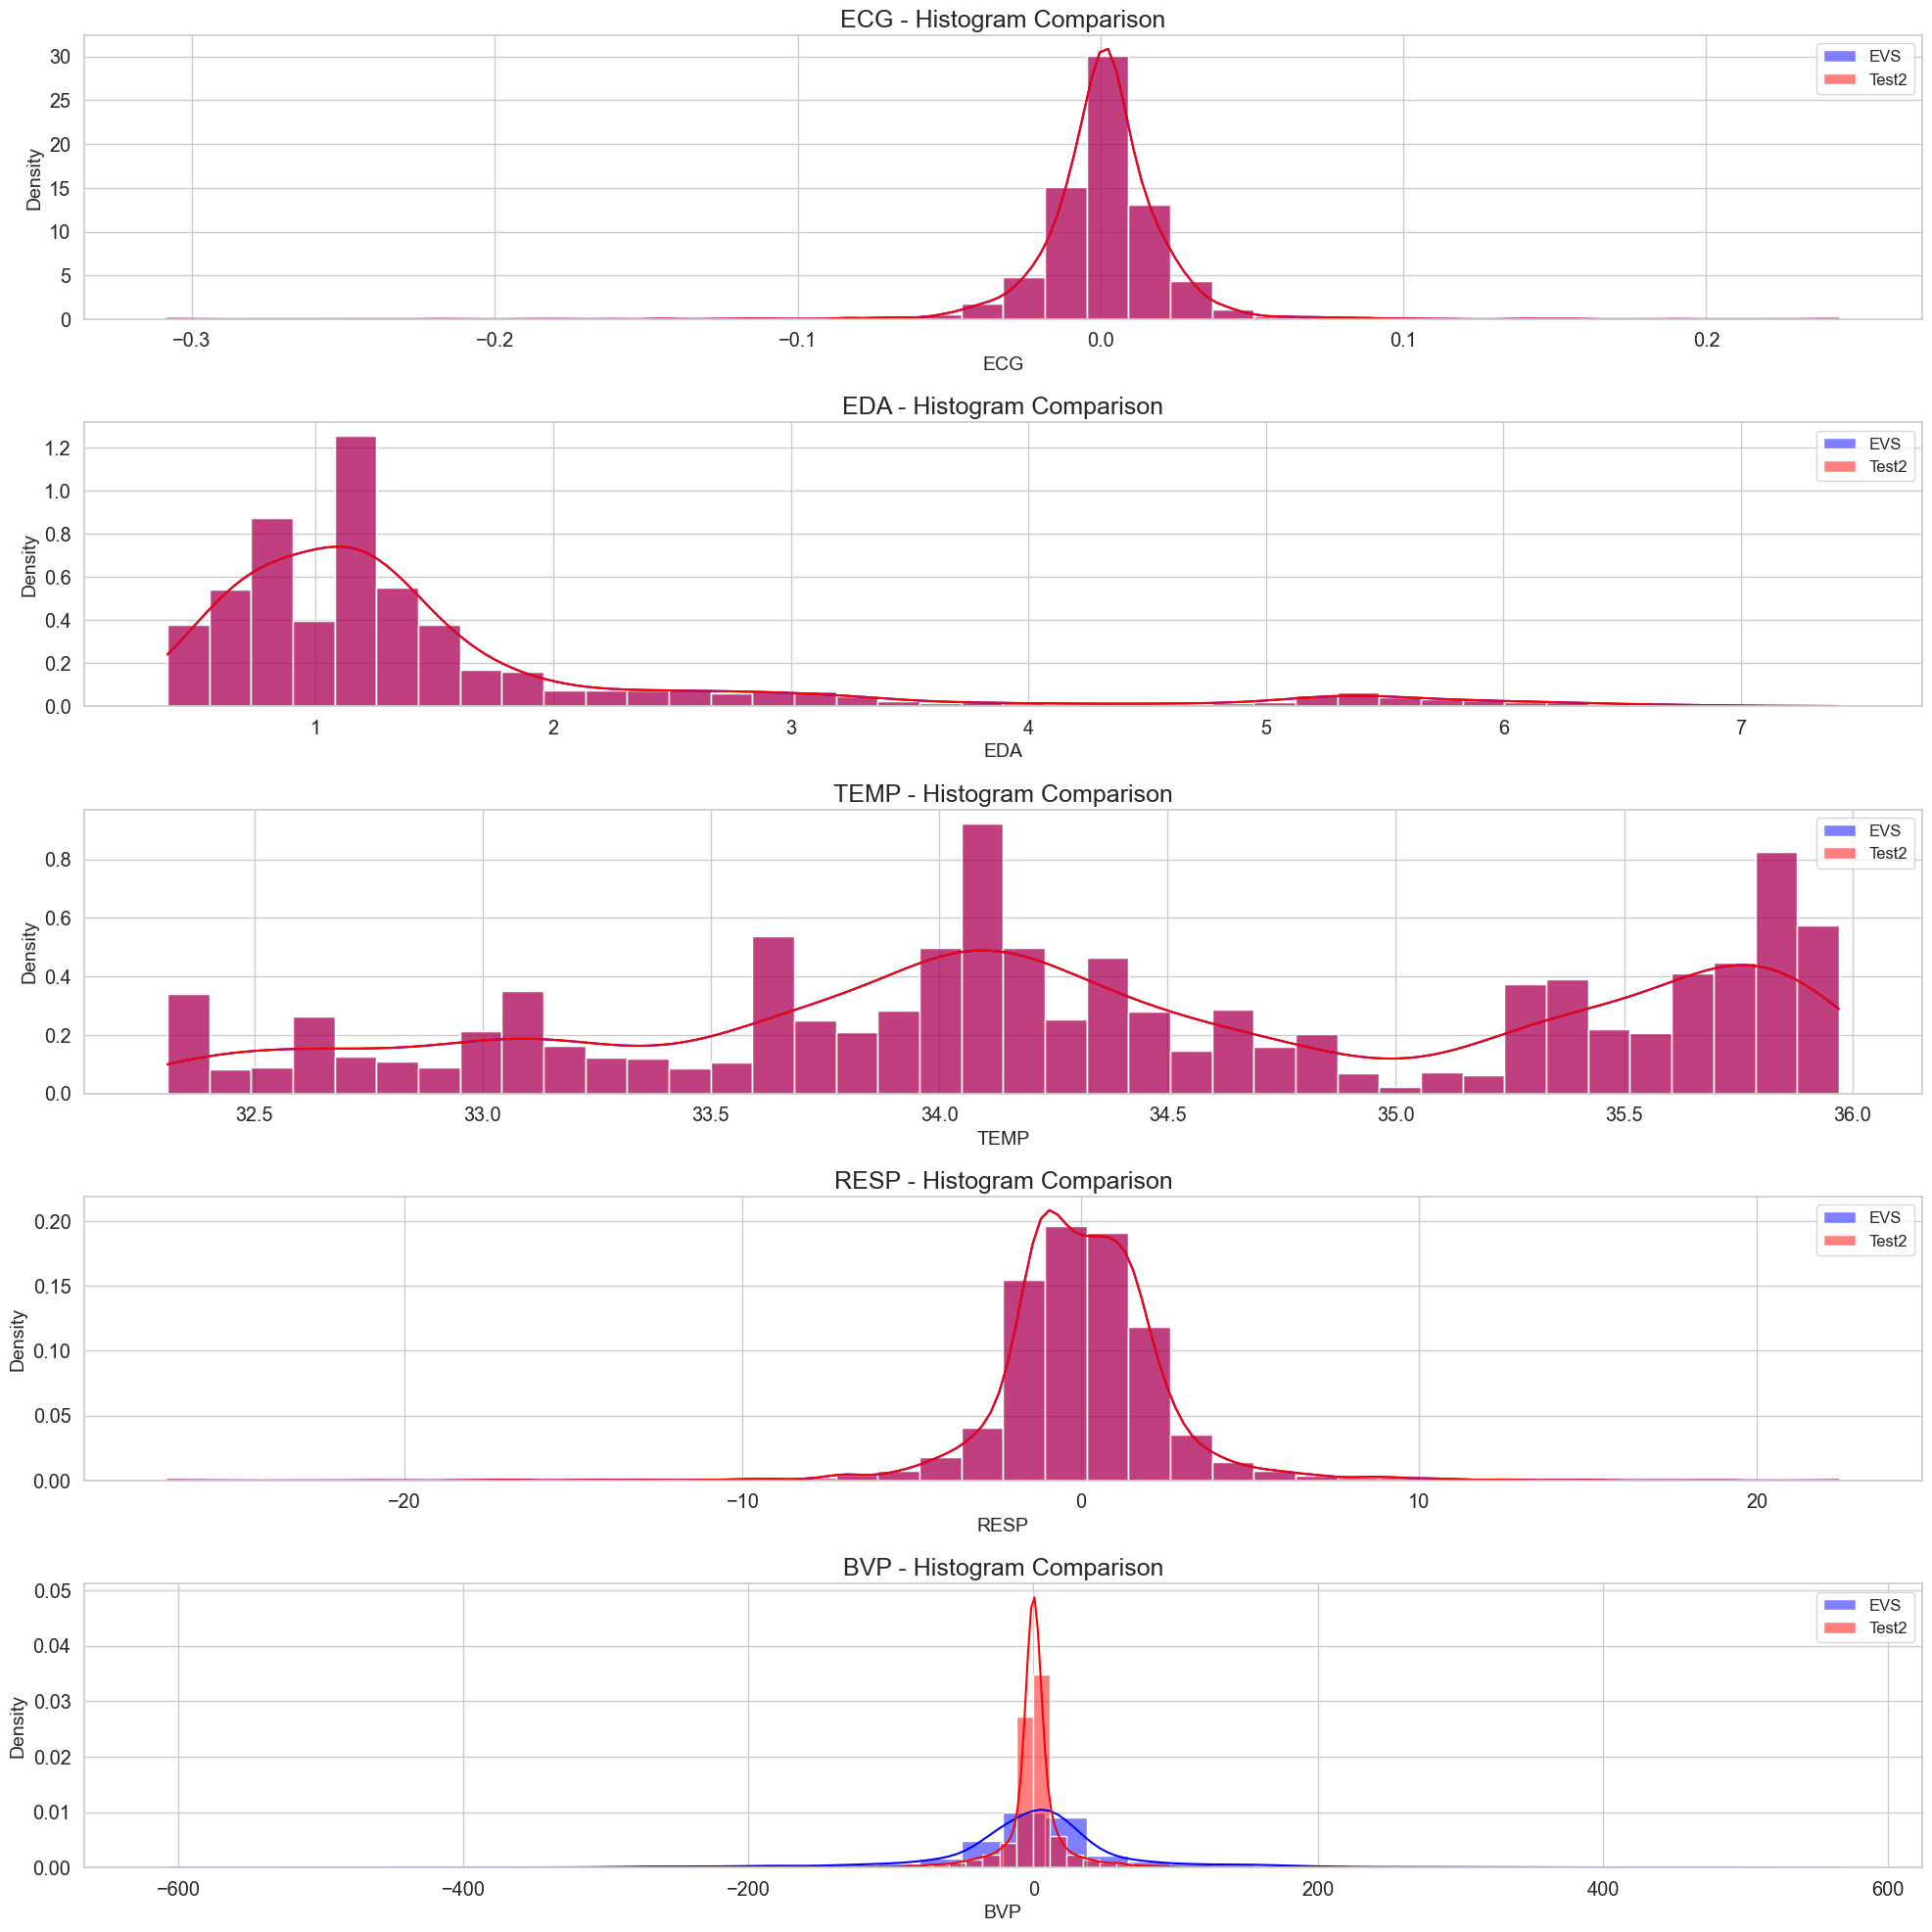

In [27]:
# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wasserstein_distance

# --- Load Data ---
df_train = pd.read_csv("PSI.csv")
df_test = pd.read_csv("../data/test2.csv")

# --- Standardize column names ---
df_train.columns = df_train.columns.str.lower()
df_test.columns = df_test.columns.str.lower()

# --- Define mapping between train and test features ---
feature_map = {
    'ecg': 'ecg',
    'eda': 'eda_chest',      # mapping EDA in EVS -> eda_chest in test2
    'temp': 'temp_wrist',    # mapping TEMP in EVS -> temp_chest
    'resp': 'resp',
    'bvp': 'bvp'        # mapping RESP in EVS -> resp
}

# --- Filter a specific subject ---
subject_id = 'S2'
df_train_sub = df_train[df_train['subject'] == subject_id].copy()
df_test_sub  = df_test[df_test['subject'] == subject_id].copy()

# --- Extract features using mapping ---
df_train_features = df_train_sub[list(feature_map.keys())].copy()
df_test_features  = df_test_sub[list(feature_map.values())].copy()

# Rename test columns to match train for comparison
df_test_features.columns = df_train_features.columns

# --- Plot histogram comparisons ---
sns.set(style="whitegrid", font_scale=1.3)
plt.figure(figsize=(20, 20))

for i, feat in enumerate(df_train_features.columns):
    plt.subplot(5, 1, i+1)
    sns.histplot(df_train_features[feat], color='blue', label='EVS', kde=True, stat='density', bins=40)
    sns.histplot(df_test_features[feat], color='red', label='Test2', kde=True, stat='density', bins=40, alpha=0.5)
    plt.title(f"{feat.upper()} - Histogram Comparison", fontsize=18)
    plt.xlabel(feat.upper(), fontsize=14)
    plt.ylabel("Density", fontsize=14)
    plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

In [28]:
# --- Compute numerical divergence metrics ---
divergence_data = []

for feat in df_train_features.columns:
    train_vals = df_train_features[feat].values
    test_vals = df_test_features[feat].values

    mean_train = train_vals.mean()
    mean_test  = test_vals.mean()
    std_train  = train_vals.std()
    std_test   = test_vals.std()
    mean_diff  = mean_test - mean_train
    std_ratio  = std_test / std_train if std_train != 0 else float('nan')
    wass_dist  = wasserstein_distance(train_vals, test_vals)

    divergence_data.append({
        'Feature': feat,
        'Mean_Train': mean_train,
        'Mean_Test': mean_test,
        'Mean_Diff': mean_diff,
        'Std_Train': std_train,
        'Std_Test': std_test,
        'Std_Ratio': std_ratio,
        'Wasserstein_Distance': wass_dist
    })

df_divergence = pd.DataFrame(divergence_data)
pd.set_option('display.float_format', lambda x: f'{x:0.4f}')

print("\n=== Divergence Table (EVS vs Test2 for Subject S2) ===")
print(df_divergence)



=== Divergence Table (EVS vs Test2 for Subject S2) ===
  Feature  Mean_Train  Mean_Test  Mean_Diff  Std_Train  Std_Test  Std_Ratio  \
0     ecg      0.0012     0.0012     0.0000     0.0214    0.0214     1.0000   
1     eda      1.5284     1.5284     0.0000     1.2382    1.2382     1.0000   
2    temp     34.3869    34.3869     0.0000     1.0453    1.0453     1.0000   
3    resp      0.0549     0.0549     0.0000     2.5597    2.5597     1.0000   
4     bvp      0.0315    -0.0004    -0.0319    81.4502   23.8702     0.2931   

   Wasserstein_Distance  
0                0.0000  
1                0.0000  
2                0.0000  
3                0.0000  
4               36.0469  
